In [1]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

The data set n90pol.csv contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables amygdala and acc indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the pre- dicted volume, after adjusting for height, sex, and similar body-type variables. The variable orientation gives the students’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal).


In [2]:
data = pd.read_csv('n90pol.csv').to_numpy()
y = data[:,2]
data = data[:,0:2]

In [3]:
data.shape

(90, 2)

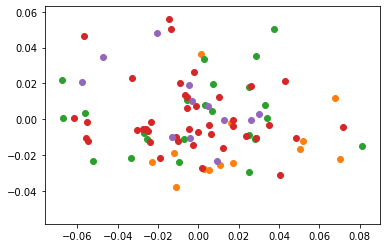

In [4]:
plt.scatter(data[np.where(y == 1),0],data[np.where(y == 1),1])
plt.scatter(data[np.where(y == 2),0],data[np.where(y == 2),1])
plt.scatter(data[np.where(y == 3),0],data[np.where(y == 3),1])
plt.scatter(data[np.where(y == 4),0],data[np.where(y == 4),1])
plt.scatter(data[np.where(y == 5),0],data[np.where(y == 5),1])

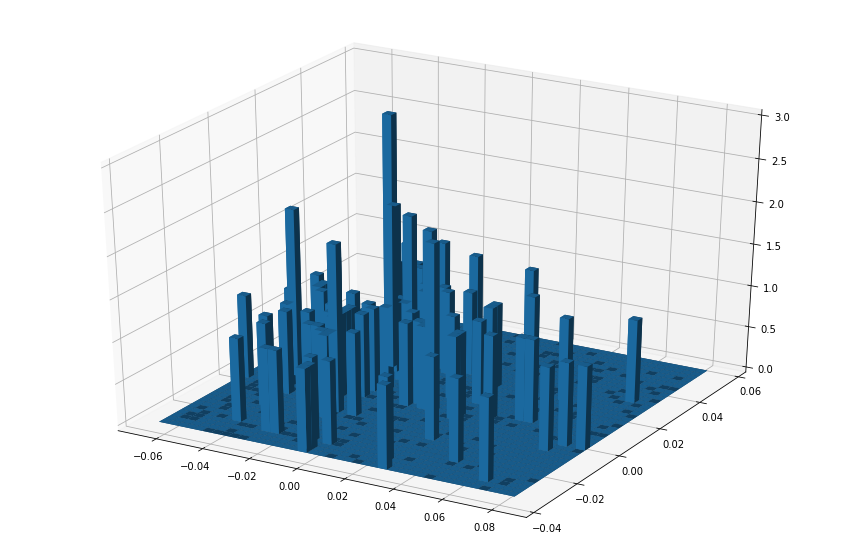

In [47]:
# for 2 dimensional data
min_data = data.min(0)
max_data = data.max(0)
nbin = 40        
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )

In [43]:
#kernel density estimator
# create an evaluation grid
m, n = data.shape
gridno = 40
inc1 = (max_data[0]-min_data[0])/gridno
inc2 = (max_data[1]-min_data[1])/gridno
gridx, gridy = np.meshgrid( np.arange(min_data[0], max_data[0]+inc1,inc1), np.arange(min_data[1], max_data[1]+inc2,inc2) )
gridall = [gridx.flatten(order = 'F'), gridy.flatten(order = 'F')]
gridall = (np.asarray(gridall)).T
gridallno, nn= gridall.shape
norm_data = (np.power(data, 2)).sum(axis=1)
norm_gridall = (np.power(gridall, 2)).sum(axis=1)
cross = np.dot(data,gridall.T)
# compute squared distance between each data point and the grid point;
#dist2 = np.matlib.repmat(norm_pdata, 1, gridallno)
dist2 = np.repeat(norm_data, repeats =gridallno).reshape((len(norm_data), gridallno))+np.tile(norm_gridall, m).reshape((len(norm_data), gridallno)) - 2* cross
#choose kernel bandwidth 1; please also experiment with other bandwidth;
bandwidth = 0.008
#evaluate the kernel function value for each training data point and grid
kernelvalue = np.exp(-dist2/2/bandwidth**2)


In [44]:
gridx.shape

(42, 41)

In [45]:
gridy.shape

(42, 41)

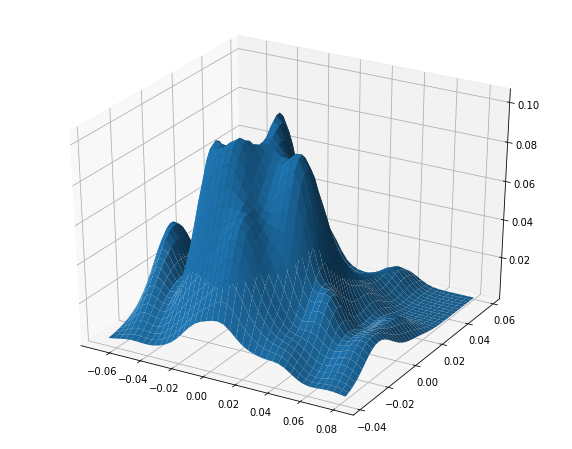

In [49]:
mkde = sum(kernelvalue) / m
#reshape back to grid;
mkde = ((mkde.T).reshape(gridx.shape[1], gridx.shape[0])).T
fig = plt.figure()
fig.set_size_inches(10, 8)
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(gridx, gridy, mkde)
plt.show()

In [53]:
df = pd.DataFrame(data, columns=['amygdala', 'acc'])
df['orientation'] = y
df.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2.0
1,-0.0674,0.0007,3.0
2,-0.0257,-0.0110,3.0
3,0.0504,-0.0167,2.0
4,0.0125,-0.0005,5.0


Text(0, 0.5, 'Probability Density')

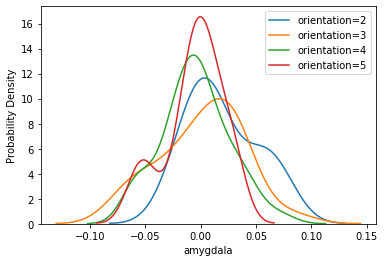

In [54]:
import seaborn as sns

sns.kdeplot(df.loc[df['orientation']==2, 'amygdala'], label='orientation=2')
sns.kdeplot(df.loc[df['orientation']==3, 'amygdala'], label='orientation=3')
sns.kdeplot(df.loc[df['orientation']==4, 'amygdala'], label='orientation=4')
sns.kdeplot(df.loc[df['orientation']==5, 'amygdala'], label='orientation=5')

plt.xlabel('amygdala')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

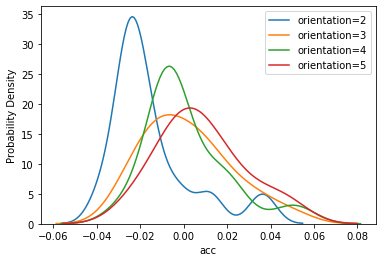

In [55]:
sns.kdeplot(df.loc[df['orientation']==2, 'acc'], label='orientation=2')
sns.kdeplot(df.loc[df['orientation']==3, 'acc'], label='orientation=3')
sns.kdeplot(df.loc[df['orientation']==4, 'acc'], label='orientation=4')
sns.kdeplot(df.loc[df['orientation']==5, 'acc'], label='orientation=5')

plt.xlabel('acc')
plt.ylabel('Probability Density')